In [1]:
%matplotlib inline
import pandas as pd
import glob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5 #(width, height)

In [2]:
all_files = glob.glob('results/**/*.csv')
header = "exec_number,iteration,opt,str_tour,result,iterations,goal,rho,tau_min,tau_max,alpha,beta".split(',')
df = pd.DataFrame()
list_ = []
for file_ in all_files:
    file_name = file_.split('/')[1]
    df_temp = pd.read_csv(file_, index_col=None, header=None, names=header)
    df_temp["file_name"] = file_name
    df_temp["instances"] = df_temp["str_tour"].apply(lambda x : len(x.split('-'))-1)
    list_.append(df_temp)
df = pd.concat(list_)
df = df[df.instances != 280]
df.head()

,exec_number,iteration,opt,str_tour,result,iterations,goal,rho,tau_min,tau_max,alpha,beta,file_name,instances
0,0,0,937,4-6-5-7-8-9-10-14-15-12-13-11-16-19-20-18-17-2...,937,59,0,0.038462,0.001479,0.961538,1.0,8.0,fri26,26
0,1,0,937,2-5-6-4-10-13-12-11-14-15-3-7-8-9-16-19-20-18-...,1029,50,10,0.038462,0.001479,0.961538,1.0,4.0,fri26,26
1,0,4,937,2-3-5-4-6-7-8-9-10-14-15-12-13-11-16-19-20-18-...,943,112,1,0.038462,0.001479,0.961538,1.0,4.0,fri26,26
2,1,2,937,13-11-10-14-15-12-1-2-3-4-6-5-7-8-9-16-19-20-1...,1001,4,10,0.038462,0.001479,0.961538,1.0,4.0,fri26,26
3,0,1,937,24-23-26-22-21-17-18-20-19-16-11-13-12-15-14-1...,946,145,1,0.038462,0.001479,0.961538,1.0,4.0,fri26,26


0


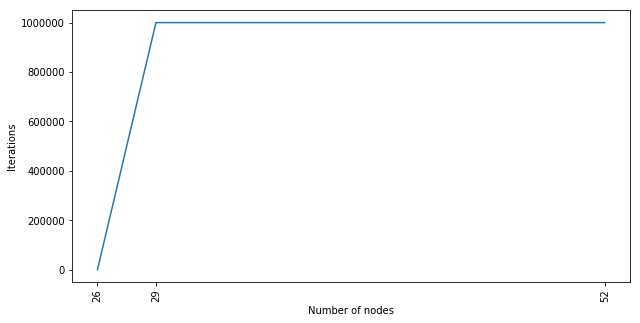

1


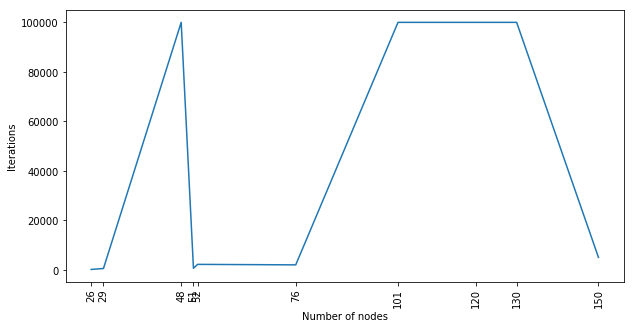

10


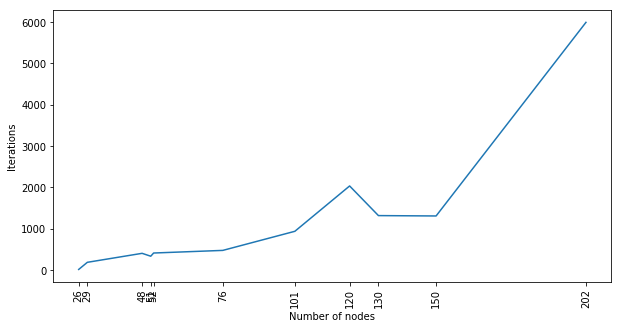

30


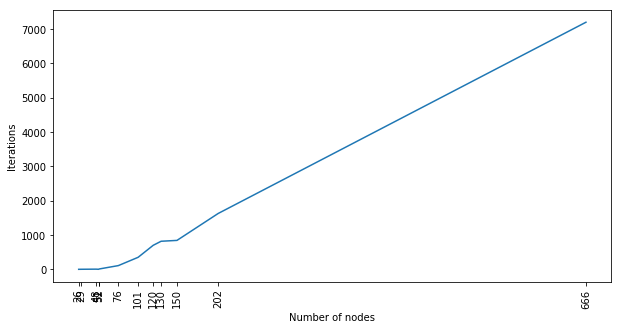

50


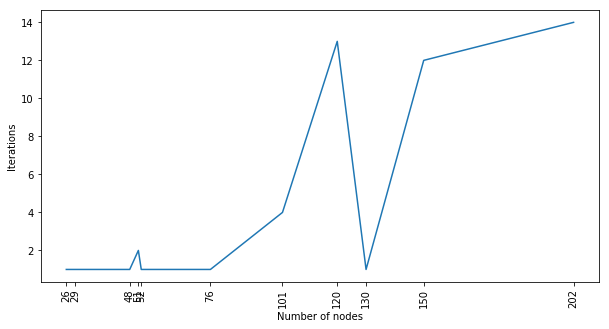

70


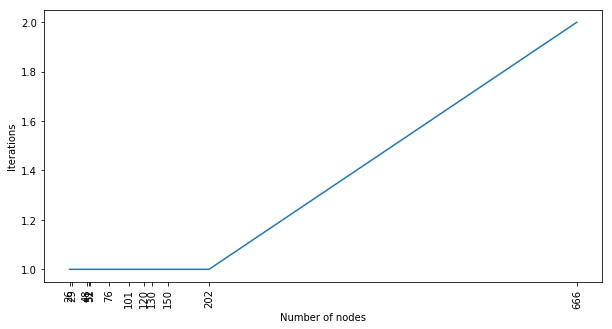

In [3]:
for goal in sorted(df["goal"].unique()):
    print(goal)
    df_goal = df[df["goal"] == goal]
    means = df_goal.groupby(['instances'])["iterations"].median()
    plt.plot(means.keys(), means.values)
    plt.xticks(means.keys(), means.keys(), rotation=90)
    plt.ylabel('Iterations')
    plt.xlabel('Number of nodes')
    plt.show()

Number of nodes: 26


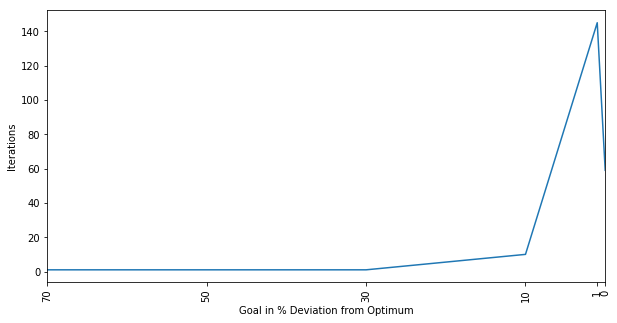

Number of nodes: 29


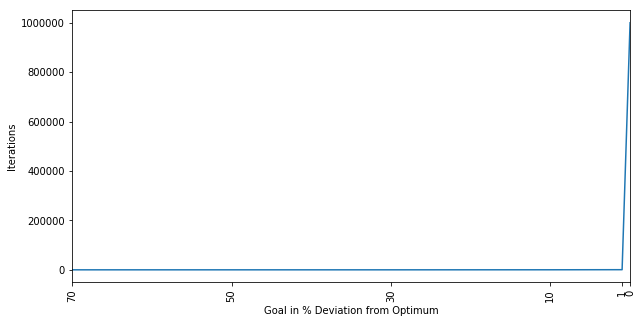

Number of nodes: 48


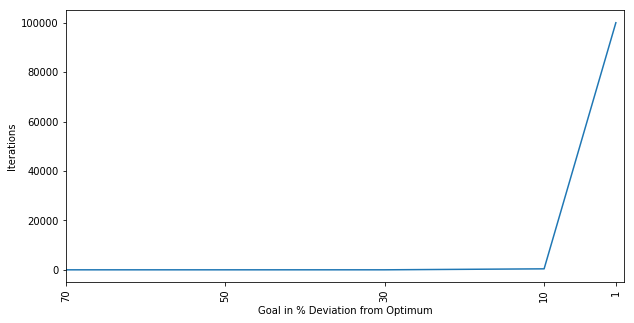

Number of nodes: 51


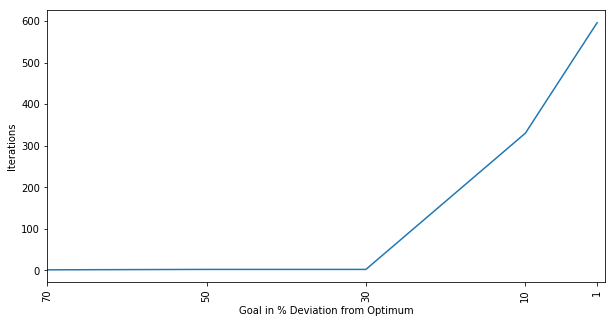

Number of nodes: 52


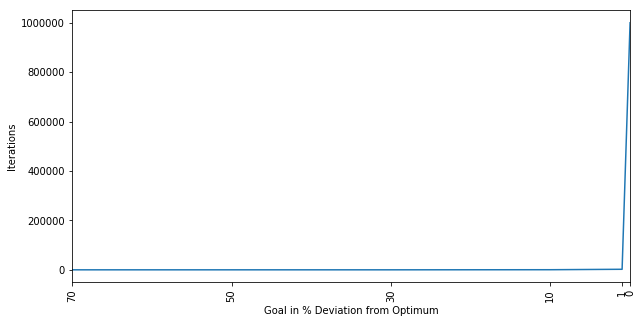

Number of nodes: 76


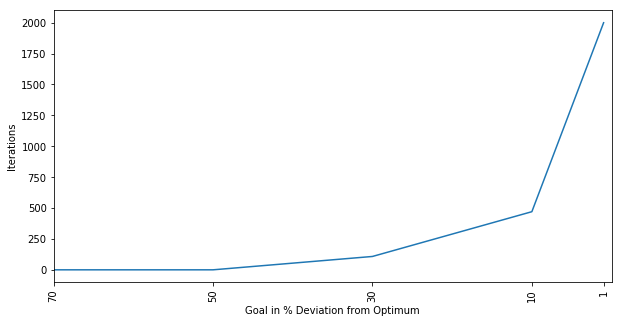

Number of nodes: 101


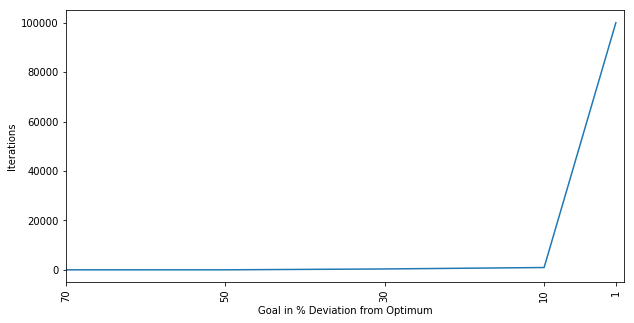

Number of nodes: 120


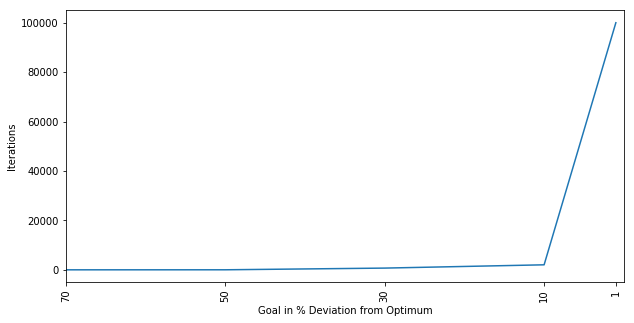

Number of nodes: 130


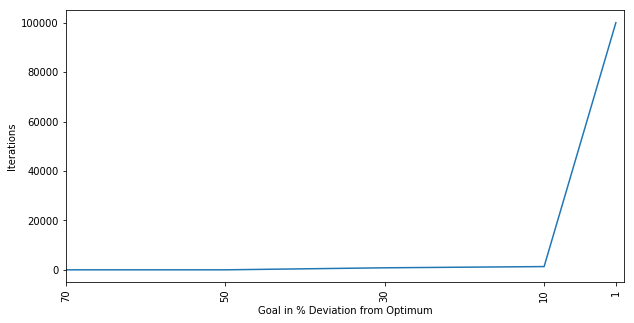

Number of nodes: 150


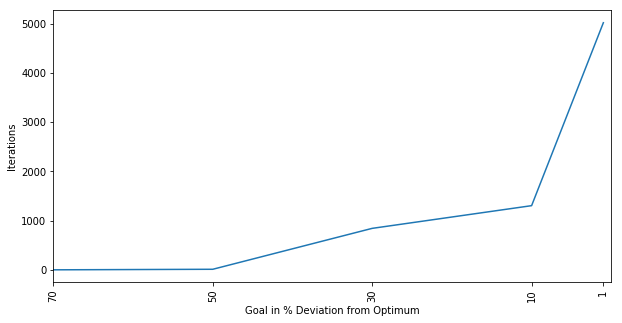

Number of nodes: 202


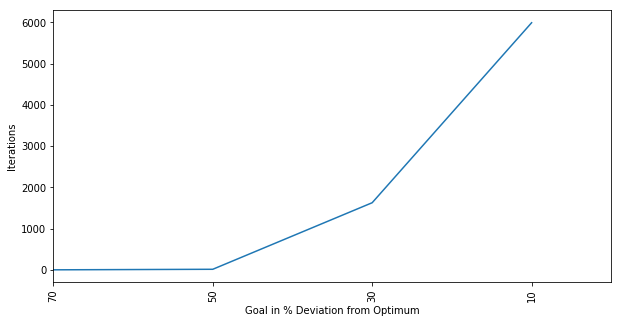

Number of nodes: 666


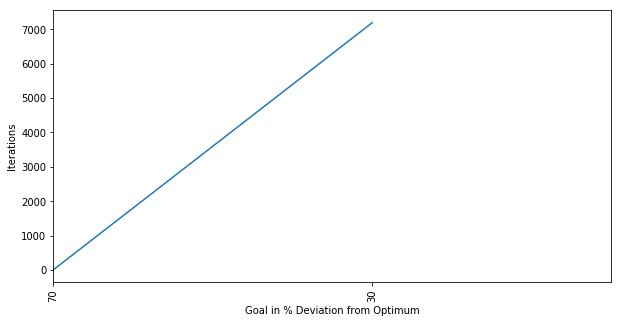

In [5]:
for instance in sorted(df["instances"].unique()):
    print("Number of nodes: " + str(instance))
    df_goal = df[df["instances"] == instance]
    means = df_goal.groupby(['goal'])["iterations"].median()
    plt.xlim(70, 0)
    plt.plot(means.keys(), means.values)
    plt.xticks(means.keys(), means.keys(), rotation=90)
    plt.ylabel('Iterations')
    plt.xlabel('Goal in % Deviation from Optimum')
    plt.show()